In [3]:
import glob
import json
import copy

data_files = glob.glob('output_2023-03-08T19*.json')
averaged_data = dict()

for filename in data_files:
    with open(filename, 'r') as f:
        file_data = json.load(f)
        for aggregation_type in file_data:
            for attack_scenario in file_data[aggregation_type]:
                for epoch in file_data[aggregation_type][attack_scenario]:
                    try:
                        averaged_data[aggregation_type][attack_scenario][epoch] += 1 / len(data_files) * file_data[aggregation_type][attack_scenario][epoch]
                    except KeyError:
                        try:
                            averaged_data[aggregation_type][attack_scenario][epoch] = 1 / len(data_files) * file_data[aggregation_type][attack_scenario][epoch]
                        except KeyError:
                            try:
                                averaged_data[aggregation_type][attack_scenario] = dict()
                            except KeyError:
                                averaged_data[aggregation_type] = dict()
                                averaged_data[aggregation_type][attack_scenario] = dict()
                            averaged_data[aggregation_type][attack_scenario][epoch] = 1 / len(data_files) * file_data[aggregation_type][attack_scenario][epoch]

data = averaged_data

0.9482416666666666


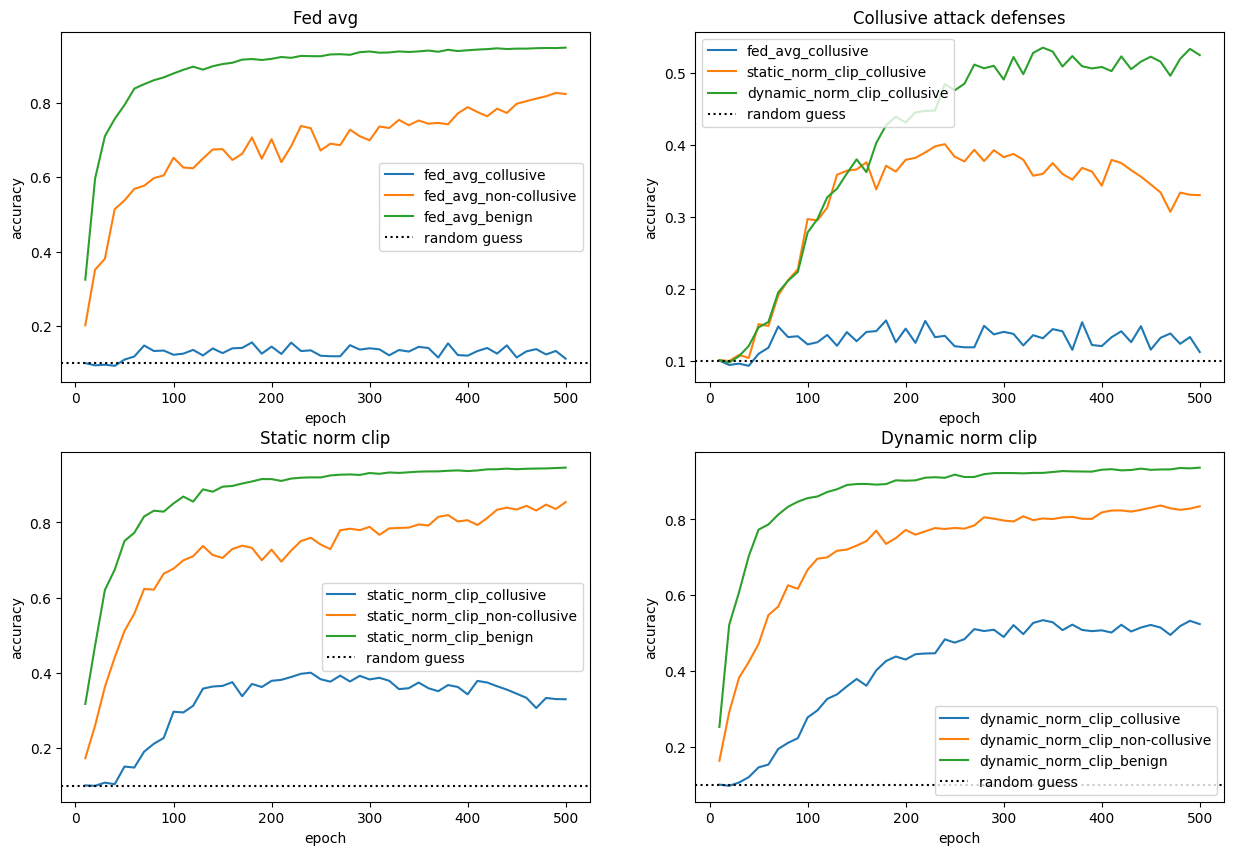

In [15]:
import json
import matplotlib.pyplot as plt

# with open('output_2023-03-08T07:02:02.140292.json', 'r') as f:
#     data = json.load(f)

flattened_data = dict()

# for aggregation_type in data:
#     for attack_scenario in data[aggregation_type]:
#         flattened_data[f'{aggregation_type}_{attack_scenario}'] = data[aggregation_type][attack_scenario]

print(data['fed_avg']['benign']['500'])

plots = {
    'Fed avg': [
        #('fed_avg', 'random'),
        ('fed_avg', 'collusive'),
        ('fed_avg', 'non-collusive'),
        ('fed_avg', 'benign')
    ],
    # 'Random v.s. collusive dynamic':[
    #     ('dynamic_norm_clip', 'random'),
    #     ('dynamic_norm_clip', 'collusive'),
    # ],
    'Collusive attack defenses': [
        ('fed_avg', 'collusive'),
        ('static_norm_clip', 'collusive'),
        ('dynamic_norm_clip', 'collusive'),
    ],
    'Static norm clip': [
        # ('static_norm_clip', 'random'),
        ('static_norm_clip', 'collusive'),
        ('static_norm_clip', 'non-collusive'),
        ('static_norm_clip', 'benign')
    ],
    'Dynamic norm clip': [
        # ('dynamic_norm_clip', 'random'),
        ('dynamic_norm_clip', 'collusive'),
        ('dynamic_norm_clip', 'non-collusive'),
        ('dynamic_norm_clip', 'benign')
    ]
    # 'Fedavg attacks': [
    #     ()
    # ]
}

plt.figure(figsize=(15, 10))
for i, (plot_title, plot_data) in enumerate(plots.items()):
    plt.subplot(2, 2, i + 1)
    for aggregation_type, attack_scenario in plot_data:
        accuracy_by_epoch = data[aggregation_type][attack_scenario]
        epochs = [int(epoch) for epoch in accuracy_by_epoch]
        plt.plot(epochs, accuracy_by_epoch.values(), label=f'{aggregation_type}_{attack_scenario}')
    
    plt.axhline(0.1, color='k', linestyle='dotted', label='random guess')
    plt.title(plot_title)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
plt.show()

0.95575


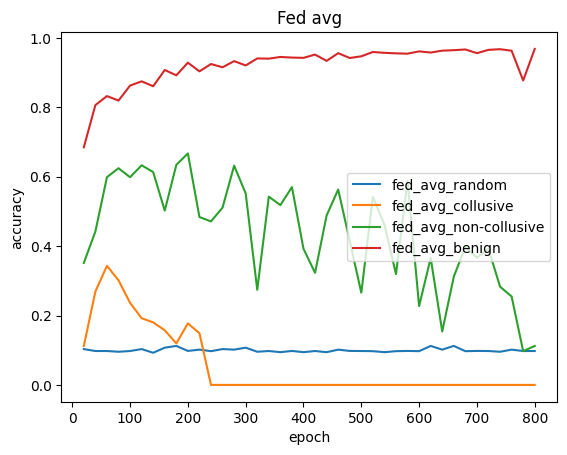

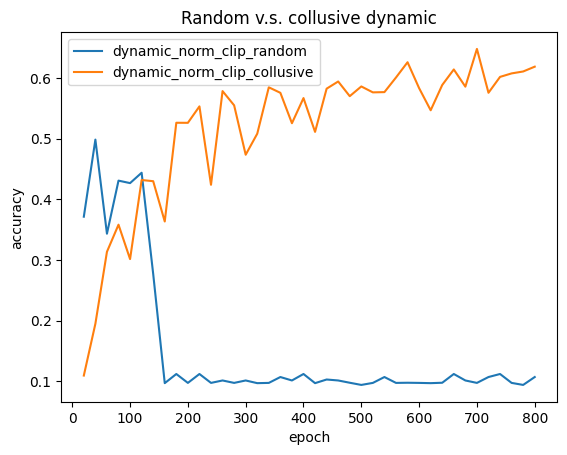

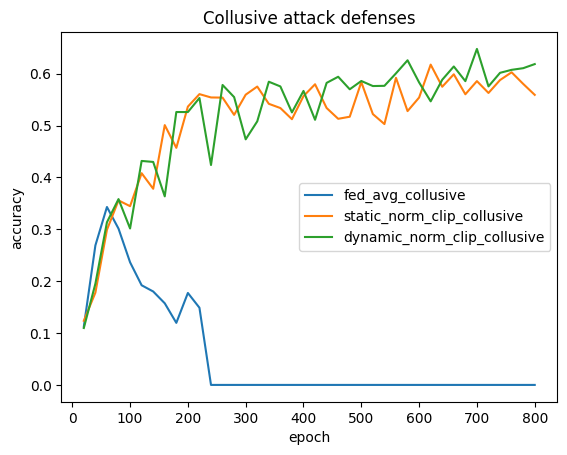

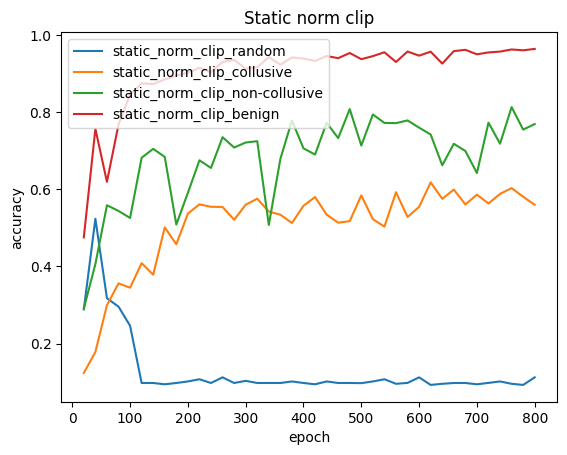

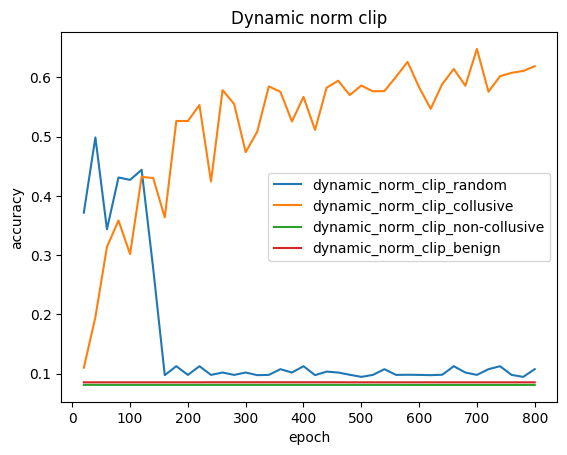

In [11]:
import json
import matplotlib.pyplot as plt

with open('output_2023-02-18T05:20:19.755095.json', 'r') as f:
    data = json.load(f)

flattened_data = dict()

print(data['fed_avg']['benign']['700'])

# for aggregation_type in data:
#     for attack_scenario in data[aggregation_type]:
#         flattened_data[f'{aggregation_type}_{attack_scenario}'] = data[aggregation_type][attack_scenario]

plots = {
    'Fed avg': [
        ('fed_avg', 'random'),
        ('fed_avg', 'collusive'),
        ('fed_avg', 'non-collusive'),
        ('fed_avg', 'benign')
    ],
    'Random v.s. collusive dynamic':[
        ('dynamic_norm_clip', 'random'),
        ('dynamic_norm_clip', 'collusive'),
    ],
    'Collusive attack defenses': [
        ('fed_avg', 'collusive'),
        ('static_norm_clip', 'collusive'),
        ('dynamic_norm_clip', 'collusive'),
    ],
    'Static norm clip': [
        ('static_norm_clip', 'random'),
        ('static_norm_clip', 'collusive'),
        ('static_norm_clip', 'non-collusive'),
        ('static_norm_clip', 'benign')
    ],
    'Dynamic norm clip': [
        ('dynamic_norm_clip', 'random'),
        ('dynamic_norm_clip', 'collusive'),
        ('dynamic_norm_clip', 'non-collusive'),
        ('dynamic_norm_clip', 'benign')
    ]
    # 'Fedavg attacks': [
    #     ()
    # ]
}

for plot_title, plot_data in plots.items():
    plt.figure()
    for aggregation_type, attack_scenario in plot_data:
        accuracy_by_epoch = data[aggregation_type][attack_scenario]
        epochs = [int(epoch) for epoch in accuracy_by_epoch]
        plt.plot(epochs, accuracy_by_epoch.values(), label=f'{aggregation_type}_{attack_scenario}')
    
    plt.title(plot_title)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()